In [1]:
#constant feature removal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold


In [4]:
data=pd.read_csv('santander-train.csv', nrows=20000)
data.shape

(20000, 371)

In [84]:
x=data.drop('TARGET', axis=1)
y=data['TARGET']
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

y_train.value_counts()

0    15350
1      650
Name: TARGET, dtype: int64

In [100]:
# use VarClusHi similar to SAS varclus to cluster variables into groups
from varclushi import VarClusHi
from sklearn.cluster import FeatureAgglomeration
agglo=FeatureAgglomeration(10)
agglo.fit(x_train)
df_transformed=agglo.transform(x_train)
print(type(agglo))

<class 'sklearn.cluster.hierarchical.FeatureAgglomeration'>


In [103]:
n_features=370
feature_identifier=range(n_features)
feature_groups=[np.array(feature_identifier)[agglo.labels_==i] for i in range(10)]
new_features=[x_train.loc[:,x_train.keys()[group]].mean(0) for group in feature_groups]

print(feature_groups)

[array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 1

In [96]:
len(list(x_train.columns))


370

In [104]:
import statsmodels.api as sm
#try the backward feature elimination method
#Backward Elimination
cols = list(x_train.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = x_train[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.Logit(y_train,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)


C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


         Current function value: inf
         Iterations: 35


C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: Singular matrix

In [7]:
constant_filter=VarianceThreshold(threshold=0)
constant_filter.fit(x_train)

VarianceThreshold(threshold=0)

In [8]:
constant_filter.get_support().sum()

291

In [10]:
#get a list of constant variables
constant_list=[not temp for temp in constant_filter.get_support()]
x.columns[constant_list]

Index(['ind_var2_0', 'ind_var2', 'ind_var13_medio_0', 'ind_var13_medio',
       'ind_var18_0', 'ind_var18', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var34_0', 'ind_var34', 'ind_var41', 'ind_var46_0',
       'ind_var46', 'num_var13_medio_0', 'num_var13_medio', 'num_var18_0',
       'num_var18', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27',
       'num_var34_0', 'num_var34', 'num_var41', 'num_var46_0', 'num_var46',
       'saldo_var13_medio', 'saldo_var18', 'saldo_var28', 'saldo_var27',
       'saldo_var34', 'saldo_var41', 'saldo_var46',
       'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3',
       'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_out_1y3',
       'delta_imp_trasp_var33_out_1y3', 'delta_num_reemb_var33_1y3',
       'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_out_1y3',
       'imp_amort_var18_hace3', 'imp_amort_var18_ult1',
       'imp_amort_var34_hace3', 'imp_amort_var34_ult1', 'imp_var7_emit_ult1',
       'imp

In [77]:
x_train_filter=constant_filter.transform(x_train)
x_test_filter=constant_filter.transform(x_test)
x_train_filter

array([[1.72820000e+04, 2.00000000e+00, 2.40000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 6.32007000e+04],
       [3.82700000e+04, 2.00000000e+00, 2.30000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 8.86406100e+04],
       [3.15260000e+04, 2.00000000e+00, 4.50000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 9.63141600e+04],
       ...,
       [2.02500000e+03, 2.00000000e+00, 4.30000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 3.82724400e+04],
       [1.73270000e+04, 2.00000000e+00, 2.30000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.17310979e+05],
       [2.54060000e+04, 2.00000000e+00, 2.30000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 3.04163070e+05]])

In [13]:
#Quasi Constant feature removal
quasi_constant_filter=VarianceThreshold(threshold=0.01)
quasi_constant_filter.fit(x_train_filter)

VarianceThreshold(threshold=0.01)

In [14]:
quasi_constant_filter.get_support().sum()


245

In [75]:
x_train_quasi_filter=quasi_constant_filter.transform(x_train_filter)
x_test_quasi_filter=quasi_constant_filter.transform(x_test_filter)
x_train_quasi_filter

array([[1.72820000e+04, 2.00000000e+00, 2.40000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 6.32007000e+04],
       [3.82700000e+04, 2.00000000e+00, 2.30000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 8.86406100e+04],
       [3.15260000e+04, 2.00000000e+00, 4.50000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 9.63141600e+04],
       ...,
       [2.02500000e+03, 2.00000000e+00, 4.30000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 3.82724400e+04],
       [1.73270000e+04, 2.00000000e+00, 2.30000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.17310979e+05],
       [2.54060000e+04, 2.00000000e+00, 2.30000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 3.04163070e+05]])

In [19]:
#remove duplicate features
x_train_T=x_train_quasi_filter.T
x_test_T=x_test_quasi_filter.T

x_train_T=pd.DataFrame(x_train_T)
x_test_T=pd.DataFrame(x_test_T)
x_train_T.head()


,0,1,2,3,4,5,6,7,8,9,...,15990,15991,15992,15993,15994,15995,15996,15997,15998,15999
0,17282.0,38270.0,31526.0,38737.0,16469.0,4464.0,302.00,22890.00,12211.0,11949.0,...,31516.0,1337.0,37006.0,19809.0,10783.00,38333.0,26389.0,2025.0,17327.0,25406.0
1,2.0,2.0,2.0,2.0,2.0,2.0,2.00,2.00,2.0,2.0,...,2.0,2.0,2.0,2.0,2.00,2.0,2.0,2.0,2.0,2.0
2,24.0,23.0,45.0,29.0,23.0,23.0,31.00,31.00,24.0,28.0,...,26.0,36.0,23.0,44.0,23.00,25.0,34.0,43.0,23.0,23.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,97.59,1005.54,0.0,0.0,...,0.0,0.0,0.0,0.0,53.85,0.0,0.0,0.0,0.0,0.0


In [20]:
x_train_T.duplicated().sum()

18

In [24]:
duplicated_features=x_train_T.duplicated()
features_to_keep=[not index for index in duplicated_features]
x_train_unique=x_train_T[features_to_keep].T
x_test_unique=x_test_T[features_to_keep].T
x_train_unique.shape

(16000, 227)

In [30]:
#build ML model and compare the performance of the selected features
def run_randomForest(x_train, x_test, y_train, y_test):
    clf=RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(x_train_unique, y_train)
    y_pred=clf.predict(x_test_unique)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))


In [31]:
run_randomForest(x_train_unique, x_test_unique, y_train, y_test)

Accuracy on test set: 
0.95875


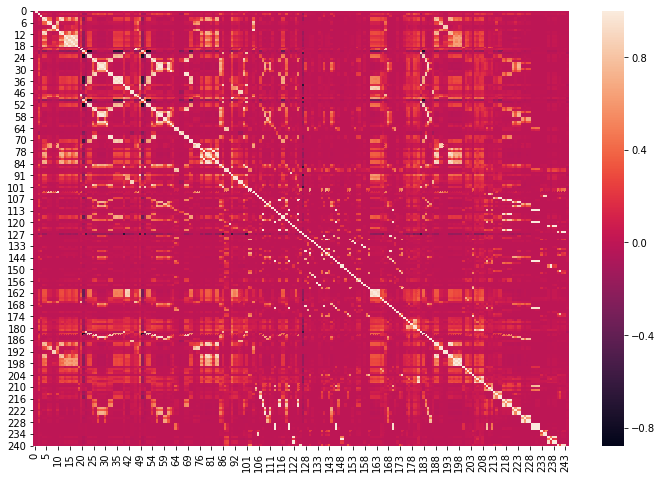

In [32]:
corrmat=x_train_unique.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corrmat)

In [36]:
def get_correlation(data, threshold):
    corr_col=set()
    corrmat=data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i,j])>threshold:
                colname=corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

In [37]:
corr_features=get_correlation(x_train_unique, 0.85)
len(corr_features)

124

In [39]:
x_train_uncorr=x_train_unique.drop(labels=corr_features, axis=1)
x_test_uncorr=x_test_unique.drop(labels=corr_features, axis=1)
x_train_uncorr.shape

(16000, 103)

In [40]:
%%time
run_randomForest(x_train_uncorr, x_test_uncorr, y_train, y_test)

Accuracy on test set: 
0.95875
Wall time: 1.72 s


In [41]:
%%time
run_randomForest(x_train, x_test, y_train, y_test)

Accuracy on test set: 
0.95875
Wall time: 1.82 s


In [62]:
##Features Grouping and Feature Importance
corrdata=corrmat.abs().stack()
corrdata

0    0      1.000000
     1      0.025277
     2      0.001942
     3      0.003594
     4      0.004054
              ...   
244  240    0.011106
     241    0.011807
     242    0.008604
     243    0.009136
     244    1.000000
Length: 51529, dtype: float64

In [63]:
corrdata=corrdata.sort_values(ascending=False)
corrdata

29   58     1.000000e+00
58   29     1.000000e+00
134  158    1.000000e+00
158  134    1.000000e+00
182  182    1.000000e+00
                ...     
229  111    1.934954e-06
231  150    6.044672e-07
150  231    6.044672e-07
231  123    3.966696e-07
123  231    3.966696e-07
Length: 51529, dtype: float64

In [64]:
corrdata=corrdata[corrdata>0.85]
corrdata=corrdata[corrdata<1]
corrdata

143  135    1.000000
135  143    1.000000
136  128    1.000000
128  136    1.000000
31   62     1.000000
              ...   
67   66     0.851384
61   28     0.851022
28   61     0.851022
72   35     0.850893
35   72     0.850893
Length: 534, dtype: float64

In [65]:
corrdata=pd.DataFrame(corrdata).reset_index()
corrdata.columns=['Features1', 'Features2', 'Corr_value']
corrdata

,Features1,Features2,Corr_value
0,143,135,1.000000
1,135,143,1.000000
2,136,128,1.000000
3,128,136,1.000000
4,31,62,1.000000
...,...,...,...
529,67,66,0.851384
530,61,28,0.851022
531,28,61,0.851022
532,72,35,0.850893


In [66]:
group_feature_list=[]
correlated_groups_list=[]
for feature in corrdata.Features1.unique():
    if feature not in group_feature_list:
        correlated_block=corrdata[corrdata.Features1==feature]
        grouped_feature_list=group_feature_list + list(correlated_block.Features2.unique())+[feature]
        correlated_groups_list.append(correlated_block)

In [67]:
len(correlated_groups_list)

170